<a href="https://colab.research.google.com/github/sharifashik591/CNN_for_CIFAR-10/blob/main/Image_classification_using_CNN_(CIFAR10_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [123]:
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras import datasets, layers,models
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

Load Dataset

In [82]:
data=tf.keras.datasets.cifar10

In [83]:
(x_train, y_train), (x_test, y_test)= data.load_data()


In [84]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [85]:
x_train[0] #that is 3d array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

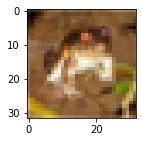

In [86]:
 plt.figure(figsize=(10,2))
 plt.imshow(x_train[0])

In [87]:
print(y_train.shape)
print(y_train[:5])

#we need 1d array

y_train=y_train.reshape(-1)

y_train

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [88]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [89]:
def plot_sample(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

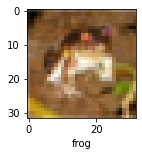

In [90]:
plot_sample(x_train,y_train,0)

Normalize data

In [91]:
print(x_train.max())
print(x_test.max())

255
255


In [92]:
x_train=x_train/255 #scalling data for better performance
x_test=x_test/255

In [93]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [94]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Bild model

In [97]:
cnn=models.Sequential([
                       #cnn
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),kernel_initializer='he_uniform', padding='valid'),
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.MaxPool2D((2,2)),
                       layers.Dropout(0.2),
                      
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.MaxPool2D((2,2)),
                       layers.Dropout(0.2),

                       layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.MaxPool2D((2,2)),
                       layers.Dropout(0.2),
                       #dense
                       layers.Flatten(),
                       layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
                       layers.Dropout(0.1),
                       layers.Dense(10,activation='softmax'),
])

In [98]:
cnn.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [102]:
datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)
train_x_y=datagen.flow(x_train,y_train,batch_size=64)

steps=int(x_train.shape[0]/64)


In [103]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)         

In [104]:
detail=cnn.fit_generator(train_x_y, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
  3/782 [..............................] - ETA: 22s - loss: 1.9599 - accuracy: 0.2656

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


782/782 [==============================] - 22s 29ms/step - loss: 1.8121 - accuracy: 0.3275 - val_loss: 1.6164 - val_accuracy: 0.4173
Epoch 2/100
782/782 [==============================] - 23s 29ms/step - loss: 1.6654 - accuracy: 0.3768 - val_loss: 1.4990 - val_accuracy: 0.4479
Epoch 3/100
782/782 [==============================] - 23s 29ms/step - loss: 1.5768 - accuracy: 0.4140 - val_loss: 1.4263 - val_accuracy: 0.4713
Epoch 4/100
782/782 [==============================] - 23s 30ms/step - loss: 1.5130 - accuracy: 0.4393 - val_loss: 1.3715 - val_accuracy: 0.4954
Epoch 5/100
782/782 [==============================] - 23s 29ms/step - loss: 1.4631 - accuracy: 0.4635 - val_loss: 1.3472 - val_accuracy: 0.5044
Epoch 6/100
782/782 [==============================] - 22s 29ms/step - loss: 1.4216 - accuracy: 0.4790 - val_loss: 1.3156 - val_accuracy: 0.5266
Epoch 7/100
782/782 [==============================] - 23s 30ms/step - loss: 1.3819 - accuracy: 0.4964 - val_loss: 1.2099 - val_accuracy: 0.56

Visulize Accuracy and loss

In [113]:
def summarize_diagnostics(model):


	# plot loss
	plt.subplot(211)
	plt.title('Loss')
	plt.plot(model.history['loss'], color='blue', label='train')
	plt.plot(model.history['val_loss'], color='orange', label='test')
  
	# plot accuracy
	plt.subplot(212)
	plt.title('Accuracy')
	plt.plot(model.history['accuracy'], color='blue', label='train')
	plt.plot(model.history['val_accuracy'], color='orange', label='test')
	
  

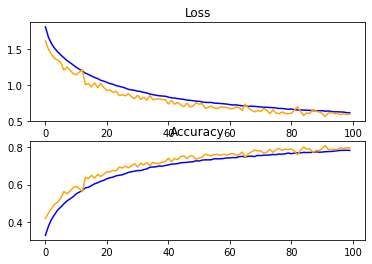

In [109]:
summarize_diagnostics(detail)

Save Model

In [116]:
cnn.save('CIFAR-10.h5')

In [117]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5961 - accuracy: 0.7968


[0.5960798859596252, 0.7968000173568726]

**Make prediction And Test from out dataset image**

In [119]:
test_file_path='/content/download (1).jpg'

In [132]:
#fit target image
img=load_img(test_file_path,target_size=(32,32))
img=img_to_array(img)
img_resized=img.reshape(1,32,32,3)
img_resized=img_resized/255






In [125]:
result=model.predict_classes(img)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [129]:
result_index=result[0]
classes[result_index]

Load Model

In [124]:
model=load_model('CIFAR-10.h5')

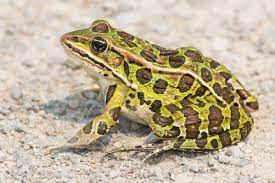

My model predict this picture is a : frog


In [139]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread(test_file_path)
cv2_imshow(image)

print('My model predict this picture is a :',classes[result_index] )

My model predict correctly